In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u

In [3]:
#load GBM data 
brain = cptac.Gbm()
gene = "EGFR"

cptac warning: This data is under a publication embargo until March 01, 2021. CPTAC is a community resource project and data are made available rapidly after generation for community research use. The embargo allows exploring and utilizing the data, but analysis may not be published until after the embargo date. Please see https://proteomics.cancer.gov/data-portal/about/data-use-agreement or enter cptac.embargo() to open the webpage for more details. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 2)


In [22]:

def plot_lin_regression(df1,x_axis, y_axis, title, ra_stats = False, show_plot = True, save_file_name = "file_name"):
    #format dfs 
    df1_subset = df1[[x_axis,y_axis]]
    #def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
    df1_subset = df1_subset.dropna(axis=0, how="any")

    x1 = df1_subset[[x_axis]].values
    y1 = df1_subset[[y_axis]].values
    x1 = x1[:,0]
    y1 = y1[:,0]

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
    
    sns.set(style="darkgrid")
    plt.rcParams["figure.figsize"] = (10,8)
    plot = sns.regplot(x=x1, y=y1, data=df1)
    plot.set(xlabel=x_axis, ylabel=y_axis, title=title)
    
     
    if ra_stats:
        #print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))
        plt.text(1.5,0.75,'Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))
    if show_plot:
        plt.show()
        plt.clf()
        plt.close()
    
    if save_file_name != "file_name":
        plt.savefig(save_file_name+'.png')
        
    
    

In [13]:
Ccrcc = cptac.Ccrcc()

In [6]:
 #Step 1 - Create df
df_gbm = brain.get_proteomics()
df_gbm


Name,A1BG,A2M,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00104,0.077630,0.487228,-0.254208,-0.144373,0.551881,-0.025276,-0.467451,-0.089511,-0.078806,0.329603,...,NaN,-0.047437,-0.105908,-0.347076,NaN,0.459635,0.079452,-0.784983,-0.488441,0.167990
C3L-00365,-0.145975,0.798796,0.184242,-0.470603,NaN,0.390211,0.245466,-0.609998,0.118625,-0.086927,...,NaN,0.161975,-0.213093,0.235571,NaN,0.107421,0.048724,0.138403,-0.290141,0.405037
C3L-00674,0.821991,1.096470,-0.094421,-0.106304,0.084578,0.176402,-0.248151,0.014061,-0.699773,-0.638462,...,NaN,-0.065534,-0.306717,0.879991,NaN,0.883564,-0.172222,0.011876,-0.131889,-0.503581
C3L-00677,-0.064567,0.129385,0.047751,-0.118187,0.237434,NaN,0.303847,0.322163,-0.555479,-0.363414,...,-0.062127,-0.254535,0.463653,0.580230,0.503044,-0.604986,0.178077,-0.720059,-0.150197,-0.268715
C3L-01040,-0.763691,-1.031834,-0.217194,-0.695701,0.184173,-0.474816,-0.051789,0.344842,-0.642746,0.068863,...,NaN,-0.092502,0.010639,-0.465079,NaN,-0.500083,0.112651,1.004660,-0.230304,-0.102416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT-RN5K.N,-1.624156,-1.163916,-0.570896,0.608478,0.756814,NaN,0.136388,1.792089,-0.047550,0.595335,...,NaN,0.298664,-0.403930,-0.482597,0.240966,NaN,0.609314,-1.293464,0.225910,-0.013637
PT-RU72.N,-1.452245,-1.147384,-0.373231,0.584371,NaN,-1.670928,-0.074499,1.893627,-0.369483,0.244199,...,NaN,0.155988,0.002551,-0.834434,NaN,-0.073908,0.637394,-0.795886,0.326046,-0.217014
PT-UTHO.N,-1.902994,-1.162469,-0.411892,0.534934,NaN,0.598046,-0.382636,1.997332,-0.134316,0.500731,...,NaN,0.016857,-0.171858,-0.462233,NaN,1.278683,0.616285,-0.734952,0.339283,-0.419138


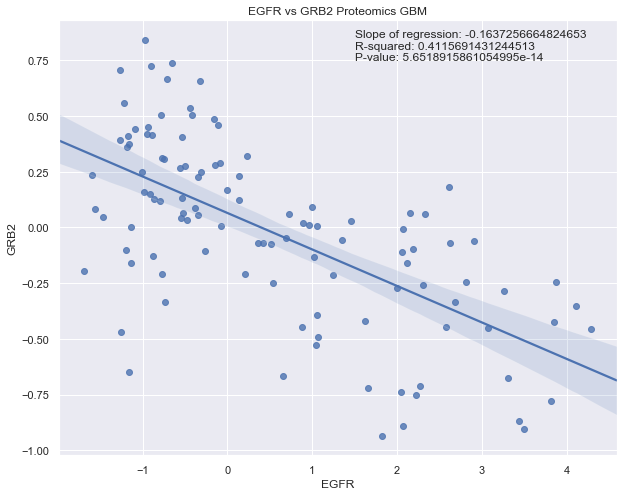

In [23]:
plot_lin_regression(df_gbm,"EGFR","GRB2","EGFR vs GRB2 Proteomics GBM", ra_stats = True,show_plot = False)

# Ccrcc

In [11]:
df_Ccrcc = Ccrcc.get_proteomics()
df_Ccrcc.columns = df_Ccrcc.columns.droplevel(1)

df_Ccrcc_subset = df_Ccrcc[["EGFR","GRB2"]]
x1 = df_Ccrcc_subset[["EGFR"]].values
y1 = df_Ccrcc_subset[["GRB2"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: 0.1950107391201895
R-squared: 0.3190044833364907
P-value: 9.660917045267772e-18


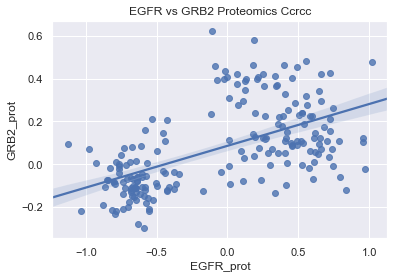

In [12]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df_Ccrcc_subset)
plot.set(xlabel='EGFR_prot', ylabel='GRB2_prot', title='EGFR vs GRB2 Proteomics Ccrcc')
plt.show()

In [13]:

en = cptac.Endometrial()

In [14]:
#format dfs 
df_endo = en.get_proteomics()
df_endo_subset = df_endo[["EGFR","GRB2"]]
df_endo_subset = df_endo_subset.dropna(axis=0, how="any")

x1 = df_endo_subset[["EGFR"]].values
y1 = df_endo_subset[["GRB2"]].values
x1 = x1[:,0]
y1 = y1[:,0]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x1,y1)
print ('Slope of regression: %s\nR-squared: %s\nP-value: %s'%(slope, r_value**2, p_value))

Slope of regression: -0.25942399931355536
R-squared: 0.19891467379499916
P-value: 2.115854588164119e-08


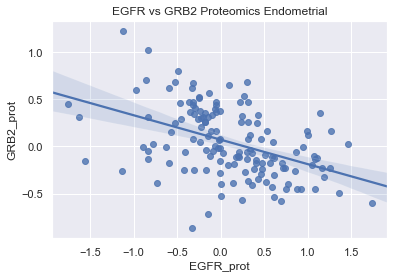

In [15]:
sns.set(style="darkgrid")
plot = sns.regplot(x=x1, y=y1, data=df_endo_subset)
plot.set(xlabel='EGFR_prot', ylabel='GRB2_prot', title='EGFR vs GRB2 Proteomics Endometrial')
plt.show()

In [3]:
hnscc = cptac.Hnscc()


In [19]:
df_hnscc = hnscc.get_proteomics()
hnscc.version()

'0.1'

# HNSCC

Slope of regression: -110.58153677792514
R-squared: 0.03205780930944972
P-value: 0.011821524944785595


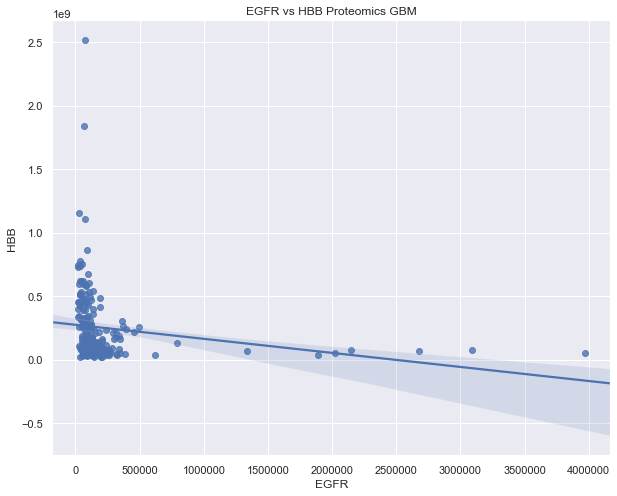

In [16]:
plot_lin_regression(df_hnscc,"EGFR","HBB","EGFR vs HBB Proteomics GBM", ra_stats = True,show_plot = True)

In [ ]:
plot_lin_regression(df_hnscc,"EGFR","HBB","EGFR vs HBB Proteomics GBM", ra_stats = True,show_plot = True)